# Part 1: Data Exploration and Preparation

In [78]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_regression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, roc_curve, auc
import time
from sklearn.neural_network import MLPRegressor, MLPClassifier
from scipy import stats

## [Q1] Dataset Overview

In [79]:
# Load the data
train = pd.read_csv('data/train.csv')
train

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C23,C24,C25,C26,C27,C28,C29,C30,regression target,classification target
0,divorced,Holders of other higher courses,second choice,Management,daytime,Higher education - degree,65.00,Portuguese,no,no,...,5.0,5,0.0,0.000000,0,11.1,0.6,2.02,0.6500,failure
1,single,Over 23 years old,second choice,Veterinary Nursing,daytime,Secondary education,65.00,Portuguese,no,no,...,6.0,14,2.0,11.333333,0,11.1,0.6,2.02,0.5500,success
2,single,1st phase - general contingent,seventh choice,Communication Design,daytime,Frequency of higher education,59.50,Portuguese,yes,no,...,6.0,8,6.0,13.625000,0,10.8,1.4,1.74,0.6160,success
3,married,Over 23 years old,second choice,Social Service,daytime,Basic education 3rd cycle (9th/10th/11th year) or equiv.,66.55,Portuguese,no,no,...,6.0,0,0.0,0.000000,0,15.5,2.8,-4.06,0.5175,failure
4,single,1st phase - general contingent,fourth choice,Nursing,daytime,Secondary education,71.00,Portuguese,yes,no,...,7.0,7,6.0,13.900000,0,7.6,2.6,0.32,0.6865,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,single,1st phase - general contingent,third choice,Communication Design,daytime,Secondary education,67.00,Portuguese,yes,no,...,6.0,11,4.0,11.333333,0,13.9,NaN,0.79,0.6385,failure
3535,single,1st phase - general contingent,second choice,Basic Education,daytime,Secondary education,66.50,Portuguese,yes,no,...,8.0,8,8.0,12.625000,0,15.5,2.8,-4.06,0.6565,success
3536,single,1st phase - general contingent,second choice,Social Service (evening attendance),evening,Secondary education,50.00,Portuguese,no,no,...,6.0,6,NaN,12.500000,0,12.7,3.7,-1.70,0.5640,success
3537,single,1st phase - general contingent,fifth choice,Social Service,daytime,Secondary education,63.50,Portuguese,yes,no,...,6.0,7,6.0,13.428571,0,11.1,0.6,2.02,0.6020,success


In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   C0                     3510 non-null   object 
 1   C1                     3539 non-null   object 
 2   C2                     3539 non-null   object 
 3   C3                     3539 non-null   object 
 4   C4                     3490 non-null   object 
 5   C5                     3431 non-null   object 
 6   C6                     3539 non-null   float64
 7   C7                     3539 non-null   object 
 8   C8                     3457 non-null   object 
 9   C9                     3397 non-null   object 
 10  C10                    3539 non-null   object 
 11  C11                    3381 non-null   object 
 12  C12                    3369 non-null   object 
 13  C13                    3419 non-null   object 
 14  C14                    3539 non-null   int64  
 15  C15 

## [Q2] Missing Values

In [81]:
# find missing values in each column
missing_values = train.isnull().sum()
missing_values

C0                        29
C1                         0
C2                         0
C3                         0
C4                        49
C5                       108
C6                         0
C7                         0
C8                        82
C9                       142
C10                        0
C11                      158
C12                      170
C13                      120
C14                        0
C15                      138
C16                        0
C17                      148
C18                        0
C19                        0
C20                      171
C21                        0
C22                       16
C23                       28
C24                        0
C25                      144
C26                        0
C27                        0
C28                        0
C29                      160
C30                        0
regression target          0
classification target      0
dtype: int64

In [82]:
# find the porpotion of missing value
porpotion = (train.isnull().sum() / len(train)).round(5)
porpotion[porpotion > 0]

C0     0.00819
C4     0.01385
C5     0.03052
C8     0.02317
C9     0.04012
C11    0.04465
C12    0.04804
C13    0.03391
C15    0.03899
C17    0.04182
C20    0.04832
C22    0.00452
C23    0.00791
C25    0.04069
C29    0.04521
dtype: float64

In [83]:
# select the numerical column

numerical = train[['C6', 'C14', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30']]
numerical

,C6,C14,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,65.00,35,0,5.0,5,0,0.000000,0,0.0,5.0,5,0.0,0.000000,0,11.1,0.6,2.02
1,65.00,25,0,6.0,13,3,11.666667,0,0.0,6.0,14,2.0,11.333333,0,11.1,0.6,2.02
2,59.50,22,0,6.0,6,6,14.166667,0,0.0,6.0,8,6.0,13.625000,0,10.8,1.4,1.74
3,66.55,42,0,6.0,0,0,0.000000,0,0.0,6.0,0,0.0,0.000000,0,15.5,2.8,-4.06
4,71.00,22,0,7.0,7,6,NaN,0,0.0,7.0,7,6.0,13.900000,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,67.00,18,1,6.0,8,6,11.714286,1,0.0,6.0,11,4.0,11.333333,0,13.9,NaN,0.79
3535,66.50,20,0,6.0,9,5,14.333333,0,4.0,8.0,8,8.0,12.625000,0,15.5,2.8,-4.06
3536,50.00,23,0,6.0,6,6,14.166667,0,0.0,6.0,6,NaN,12.500000,0,12.7,3.7,-1.70
3537,63.50,19,0,6.0,6,6,13.500000,0,0.0,6.0,7,6.0,13.428571,0,11.1,0.6,2.02


In [84]:
# information about the first three numerical data

train[['C6', 'C14', 'C16']].describe()

,C6,C14,C16
count,3539.000000,3539.000000,3539.000000
mean,66.324696,23.204012,0.683526
std,6.619953,7.427675,2.275012
min,47.500000,17.000000,0.000000
25%,62.500000,19.000000,0.000000
50%,66.550000,20.000000,0.000000
75%,70.000000,25.000000,0.000000
max,95.000000,70.000000,20.000000


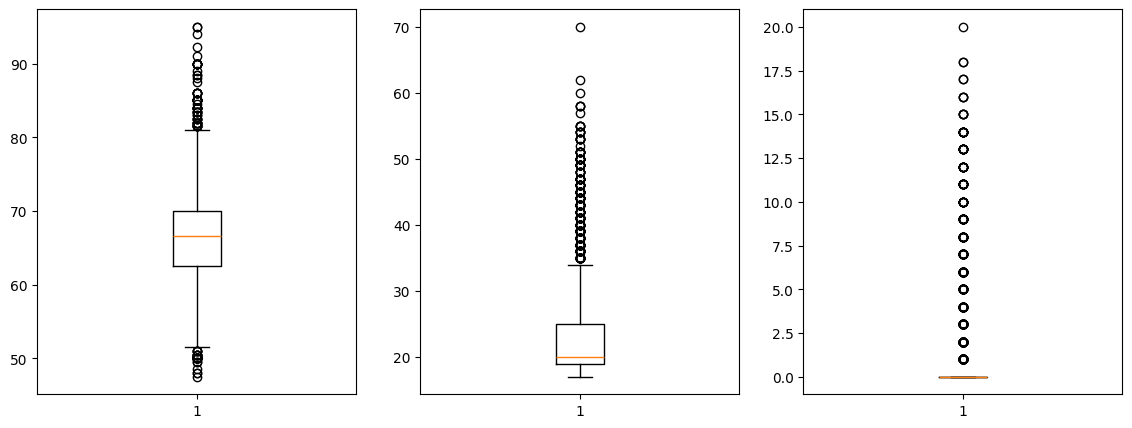

In [85]:
# draw boxplot
fig, ax = plt.subplots(1, 3, figsize =(14,5))
ax[0].boxplot(train[['C6']])
ax[1].boxplot(train[['C14']])
ax[2] .boxplot(train[['C16']])
plt.show()

In [86]:
#select the categorical data

category = train[['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15']]
category


,C0,C1,C2,C3,C4,C5,C7,C8,C9,C10,C11,C12,C13,C15
0,divorced,Holders of other higher courses,second choice,Management,daytime,Higher education - degree,Portuguese,no,no,no,yes,female,no,no
1,single,Over 23 years old,second choice,Veterinary Nursing,daytime,Secondary education,Portuguese,no,no,no,yes,NaN,yes,no
2,single,1st phase - general contingent,seventh choice,Communication Design,daytime,Frequency of higher education,Portuguese,yes,no,no,yes,male,no,no
3,married,Over 23 years old,second choice,Social Service,daytime,Basic education 3rd cycle (9th/10th/11th year) or equiv.,Portuguese,no,no,no,yes,male,no,no
4,single,1st phase - general contingent,fourth choice,Nursing,daytime,Secondary education,Portuguese,yes,no,no,yes,female,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,single,1st phase - general contingent,third choice,Communication Design,daytime,Secondary education,Portuguese,yes,no,no,no,female,no,NaN
3535,single,1st phase - general contingent,second choice,Basic Education,daytime,Secondary education,Portuguese,yes,no,no,yes,female,no,no
3536,single,1st phase - general contingent,second choice,Social Service (evening attendance),evening,Secondary education,Portuguese,no,no,no,yes,female,yes,no
3537,single,1st phase - general contingent,fifth choice,Social Service,daytime,Secondary education,Portuguese,yes,no,no,yes,female,yes,no


In [87]:
unique = train[['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15']].nunique()
print(unique)

C0      6
C1     18
C2      8
C3     17
C4      2
C5     17
C7     19
C8      2
C9      2
C10     2
C11     2
C12     2
C13     2
C15     2
dtype: int64


In [88]:
C0count = train['C0'].value_counts()
C1count = train['C1'].value_counts()
C2count = train['C2'].value_counts()
print(C0count)
print('')
print(C1count)
print('')
print(C2count)

C0
single               3115
married               296
divorced               75
facto union            18
legally separated       3
widower                 3
Name: count, dtype: int64

C1
1st phase - general contingent                         1351
2nd phase - general contingent                          708
Over 23 years old                                       630
Change of course                                        253
Technological specialization diploma holders            160
Holders of other higher courses                         109
3rd phase - general contingent                          105
Transfer                                                 67
Change of institution/course                             45
Short cycle diploma holders                              30
1st phase - special contingent (Madeira Island)          29
International student (bachelor)                         26
1st phase - special contingent (Azores Island)           14
Ordinance No. 854-B/99         

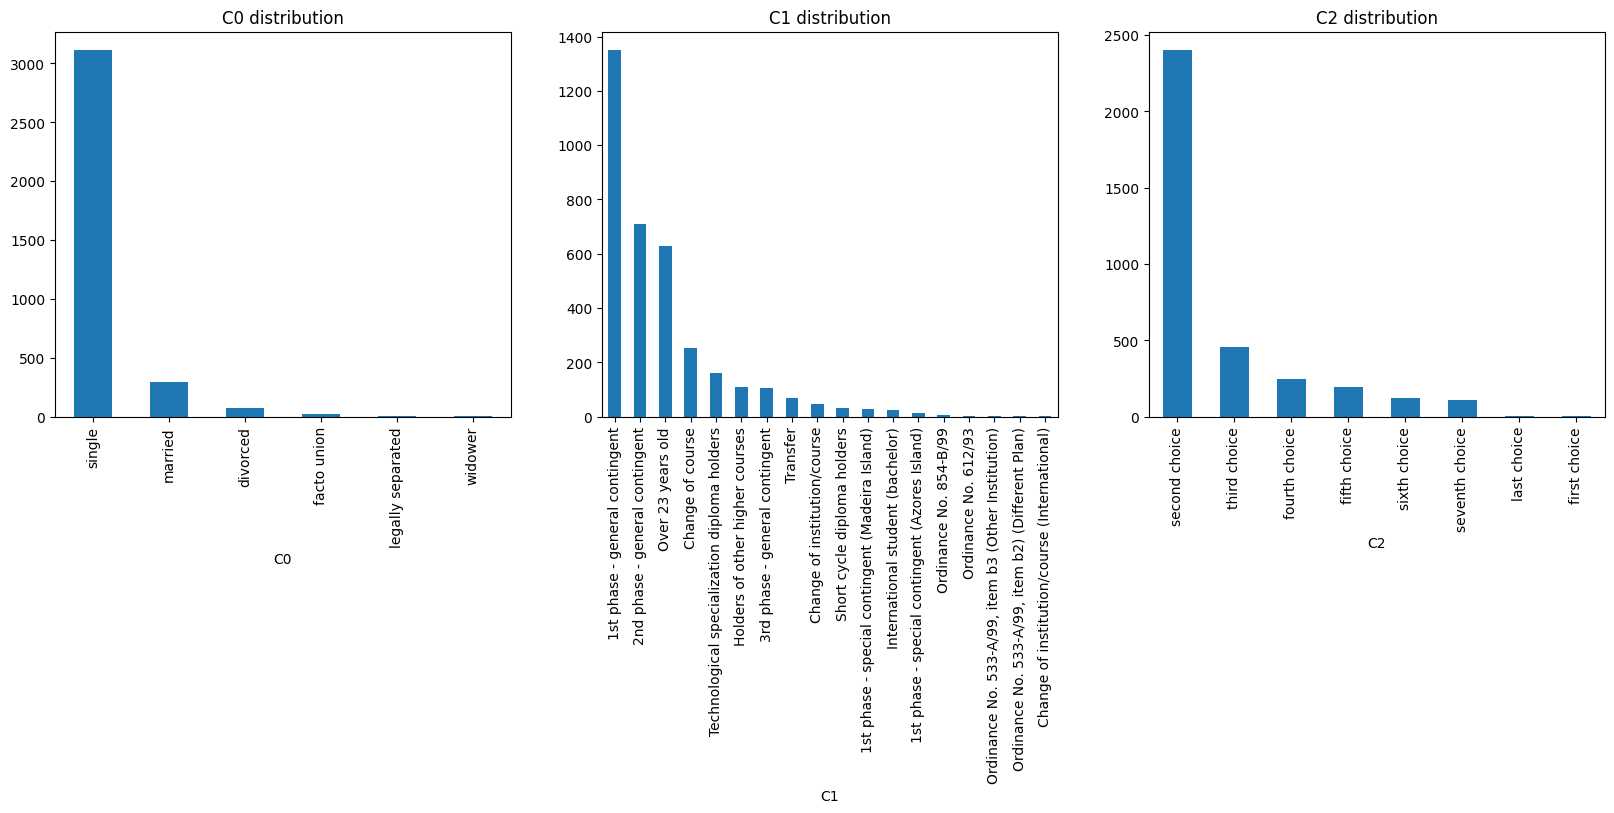

In [89]:
fix, ax = plt.subplots(1, 3, figsize=(20,5))

C0count.plot(kind='bar', ax = ax[0])
ax[0].set_title("C0 distribution")

C1count.plot(kind='bar', ax = ax[1])
ax[1].set_title("C1 distribution")

C2count.plot(kind='bar', ax = ax[2])
ax[2].set_title("C2 distribution")
plt.show()

## Q4: Outliers

In [90]:
# Interquartile Range (IQR) method
Q1 = train['C6'].quantile(0.25)
Q3 = train['C6'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = train[(train['C6'] < lower_bound) | (train['C6'] > upper_bound)]['C6']
print(outliers)

18      50.0
20      50.0
59      88.5
77      84.0
93      84.0
        ... 
3427    82.0
3431    50.0
3487    90.0
3490    88.5
3536    50.0
Name: C6, Length: 147, dtype: float64


In [91]:
Q1 = train['C14'].quantile(0.25)
Q3 = train['C14'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = train[(train['C14'] < lower_bound) | (train['C14'] > upper_bound)]['C14']
print(outliers)

0       35
3       42
40      35
47      38
49      42
        ..
3463    41
3484    38
3499    37
3518    36
3523    37
Name: C14, Length: 340, dtype: int64


In [92]:
Q1 = train['C16'].quantile(0.25)
Q3 = train['C16'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = train[(train['C16'] < lower_bound) | (train['C16'] > upper_bound)]['C16']
print(outliers)

5        2
12       2
14       1
17       3
18      11
        ..
3499     5
3500    11
3512     7
3528     8
3534     1
Name: C16, Length: 454, dtype: int64


In [93]:
z_score = np.abs(stats.zscore(train['C6']))
threshold = 2
outliers = train['C6'][z_score > threshold]
outliers

9       80.0
12      80.0
18      50.0
20      50.0
29      80.0
        ... 
3431    50.0
3469    80.5
3487    90.0
3490    88.5
3536    50.0
Name: C6, Length: 252, dtype: float64

In [94]:
z_score = np.abs(stats.zscore(train['C14']))
threshold = 2
outliers = train['C14'][z_score > threshold]
outliers

3       42
49      42
85      39
99      48
136     43
        ..
3412    50
3415    43
3431    40
3448    45
3463    41
Name: C14, Length: 222, dtype: int64

In [95]:
z_score = np.abs(stats.zscore(train['C16']))
threshold = 2
outliers = train['C16'][z_score > threshold]
outliers

18      11
33       8
58       7
83       9
121      6
        ..
3448     8
3470    11
3500    11
3512     7
3528     8
Name: C16, Length: 185, dtype: int64

## Q5: Correlation Analysis

<Axes: >

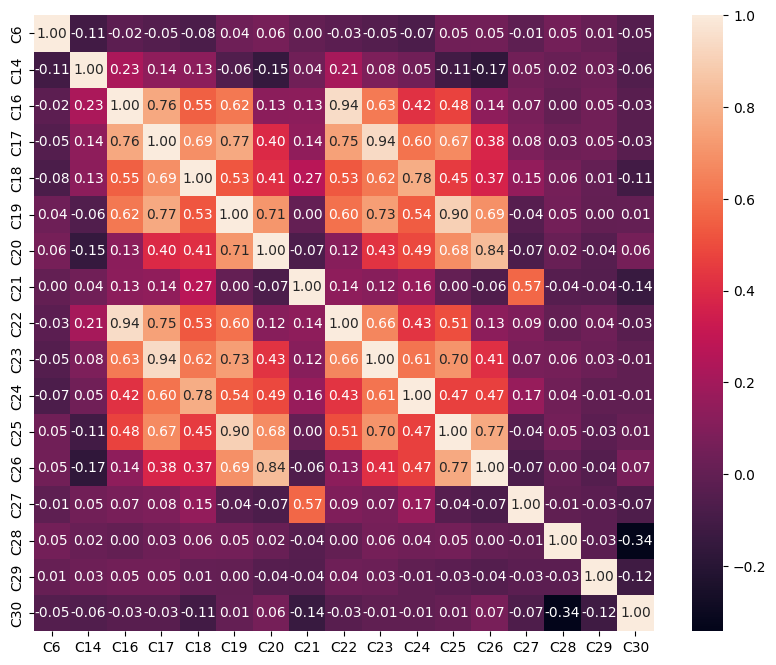

In [96]:
plt.figure(figsize = (10,8))
sns.heatmap(numerical.corr(), annot=True, fmt = '.2f')

In [97]:
print(numerical.corr())

           C6       C14       C16       C17       C18       C19       C20  \
C6   1.000000 -0.111374 -0.018841 -0.045938 -0.077389  0.038950  0.062857   
C14 -0.111374  1.000000  0.225047  0.136557  0.134538 -0.056920 -0.152041   
C16 -0.018841  0.225047  1.000000  0.764918  0.549814  0.619279  0.125667   
C17 -0.045938  0.136557  0.764918  1.000000  0.687466  0.772668  0.396275   
C18 -0.077389  0.134538  0.549814  0.687466  1.000000  0.527342  0.414727   
C19  0.038950 -0.056920  0.619279  0.772668  0.527342  1.000000  0.708144   
C20  0.062857 -0.152041  0.125667  0.396275  0.414727  0.708144  1.000000   
C21  0.001539  0.042320  0.132142  0.141358  0.267813  0.003829 -0.073162   
C22 -0.027408  0.208677  0.942614  0.745162  0.530025  0.597771  0.115932   
C23 -0.046306  0.084241  0.625563  0.941014  0.618744  0.734093  0.427075   
C24 -0.070843  0.045085  0.421601  0.601553  0.781797  0.541350  0.486700   
C25  0.045212 -0.110133  0.475408  0.674216  0.451622  0.901075  0.681601   

# Part 2: Data Preprocessing Techniques

## Q7: Handling Missing Values
First look into each features with missing values

In [98]:
train[['C17', 'C20', 'C22', 'C23', 'C25','C29']].describe()

,C17,C20,C22,C23,C25,C29
count,3391.000000,3368.000000,3523.000000,3511.000000,3395.000000,3379.000000
mean,6.242996,10.624829,0.522566,6.182284,4.420029,1.235218
std,2.475471,4.852394,1.853137,2.192147,2.994448,1.381189
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.800000
25%,5.000000,11.000000,0.000000,5.000000,2.000000,0.300000
50%,6.000000,12.328175,0.000000,6.000000,5.000000,1.400000
75%,7.000000,13.400000,0.000000,7.000000,6.000000,2.600000
max,26.000000,18.875000,18.000000,23.000000,20.000000,3.700000


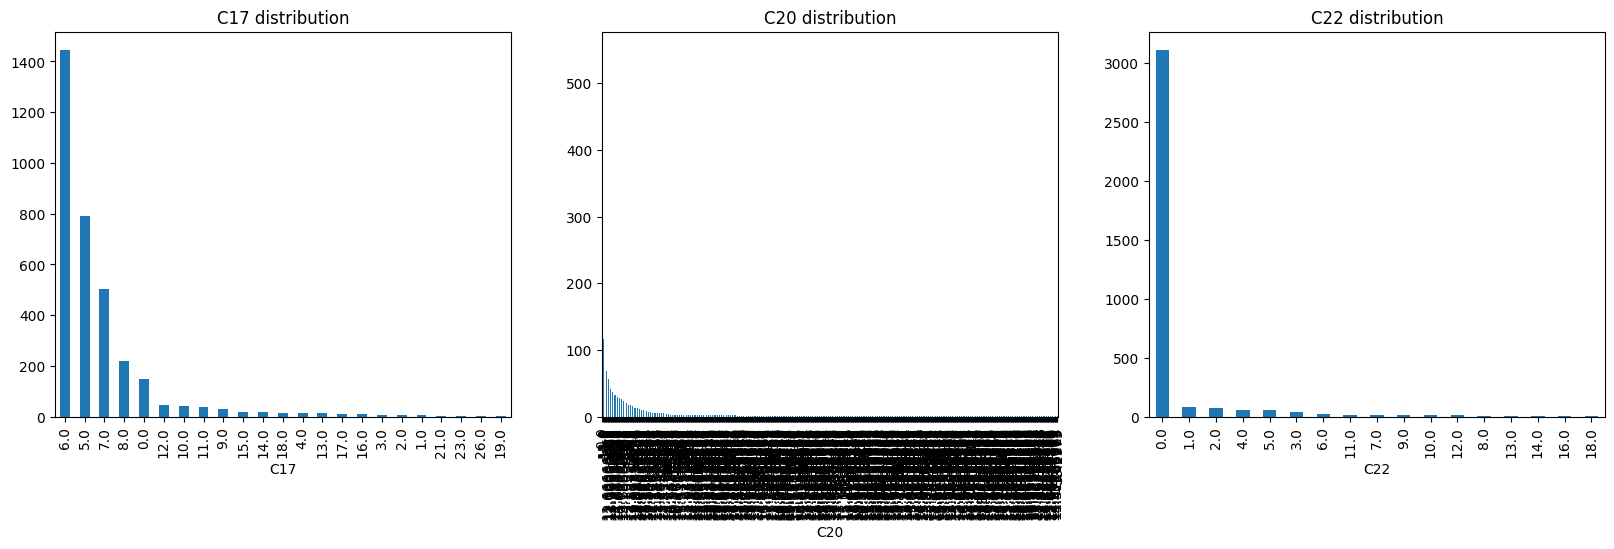

In [99]:
C0count = train['C17'].value_counts()
C1count = train['C20'].value_counts()
C2count = train['C22'].value_counts()

fix, ax = plt.subplots(1, 3, figsize=(20,5))

C0count.plot(kind='bar', ax = ax[0])
ax[0].set_title("C17 distribution")

C1count.plot(kind='bar', ax = ax[1])
ax[1].set_title("C20 distribution")

C2count.plot(kind='bar', ax = ax[2])
ax[2].set_title("C22 distribution")
plt.show()

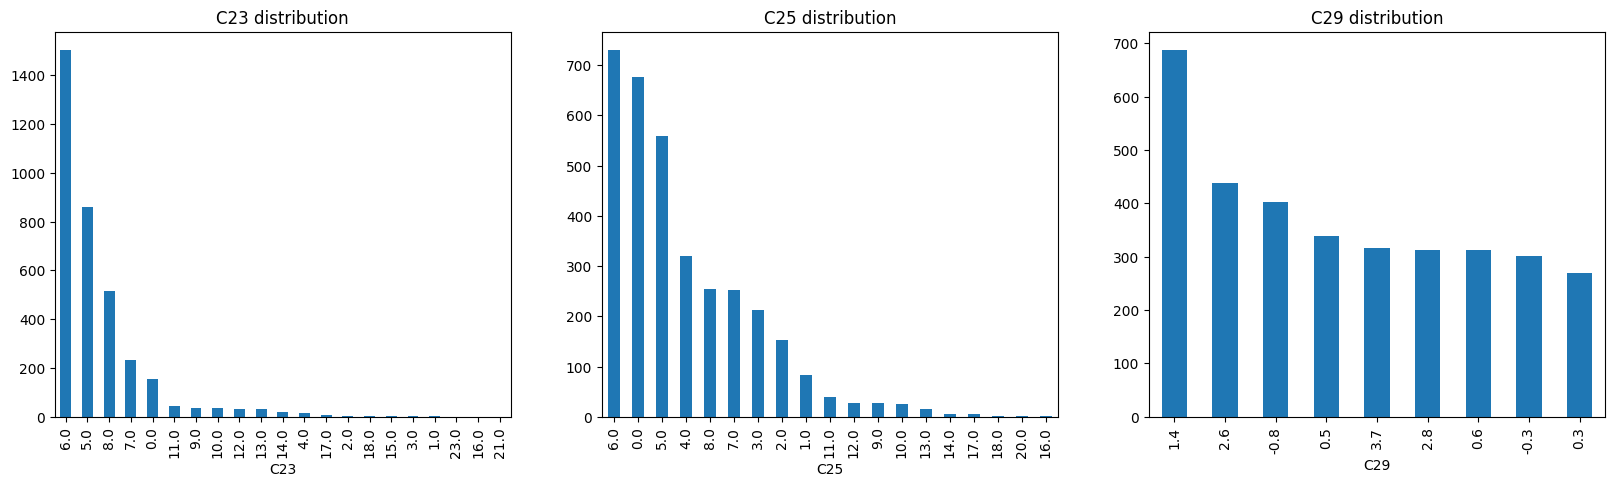

In [100]:
C0count = train['C23'].value_counts()
C1count = train['C25'].value_counts()
C2count = train['C29'].value_counts()

fix, ax = plt.subplots(1, 3, figsize=(20,5))

C0count.plot(kind='bar', ax = ax[0])
ax[0].set_title("C23 distribution")

C1count.plot(kind='bar', ax = ax[1])
ax[1].set_title("C25 distribution")

C2count.plot(kind='bar', ax = ax[2])
ax[2].set_title("C29 distribution")
plt.show()

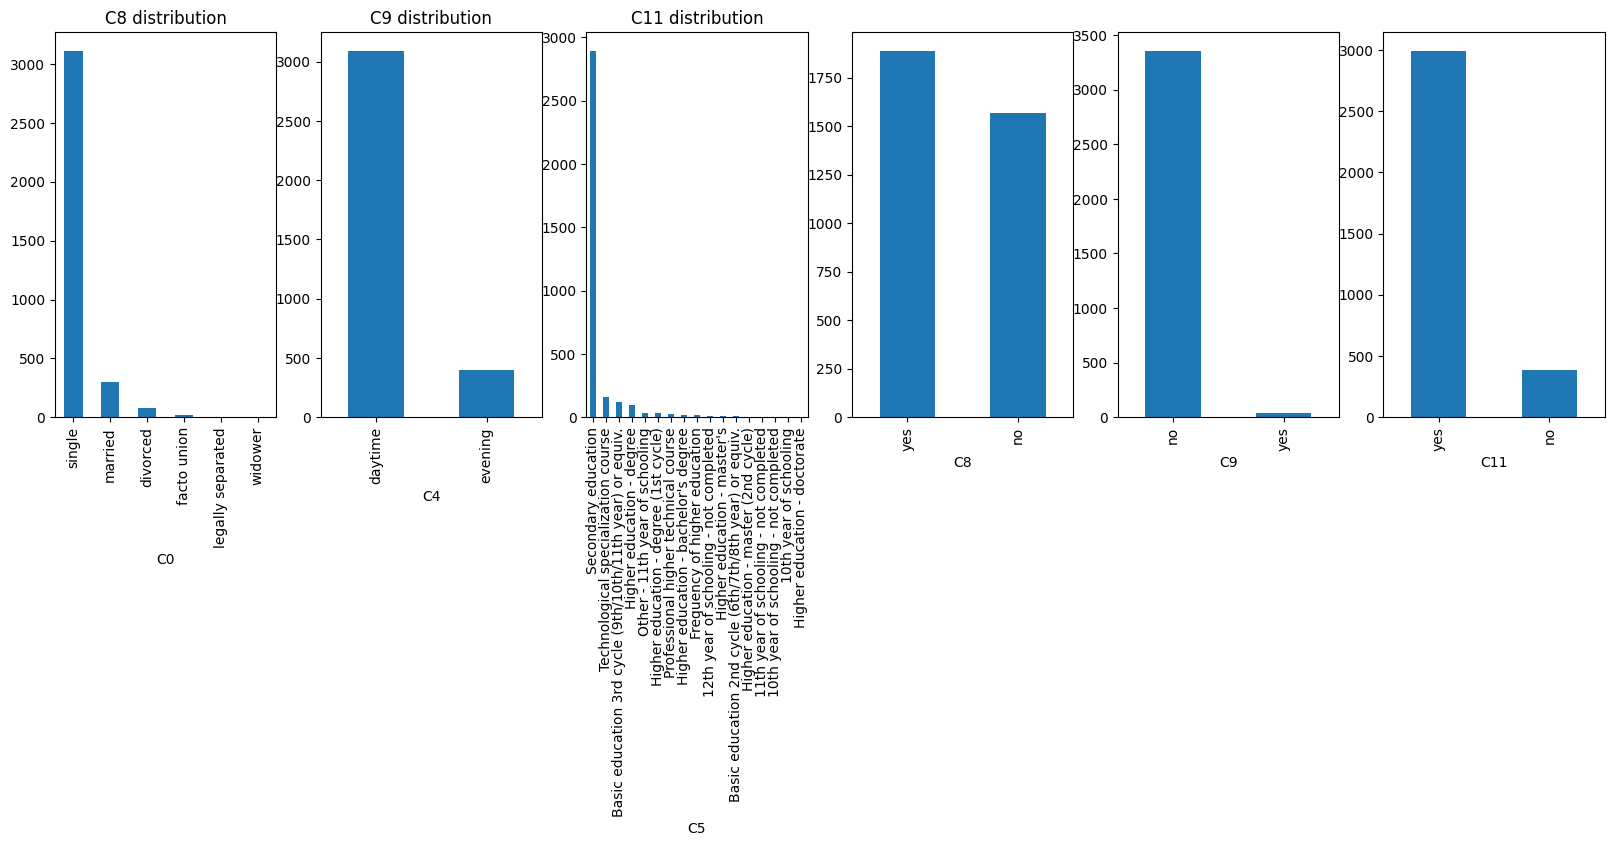

In [101]:
C0count = train['C0'].value_counts()
C1count = train['C4'].value_counts()
C2count = train['C5'].value_counts()
C3count = train['C8'].value_counts()
C4count = train['C9'].value_counts()
C5count = train['C11'].value_counts()

fix, ax = plt.subplots(1, 6, figsize=(20,5))

C0count.plot(kind='bar', ax = ax[0])
ax[0].set_title("C0 distribution")

C1count.plot(kind='bar', ax = ax[1])
ax[1].set_title("C4 distribution")

C2count.plot(kind='bar', ax = ax[2])
ax[2].set_title("C5 distribution")

C3count.plot(kind='bar', ax = ax[3])
ax[0].set_title("C8 distribution")

C4count.plot(kind='bar', ax = ax[4])
ax[1].set_title("C9 distribution")

C5count.plot(kind='bar', ax = ax[5])
ax[2].set_title("C11 distribution")

plt.show()

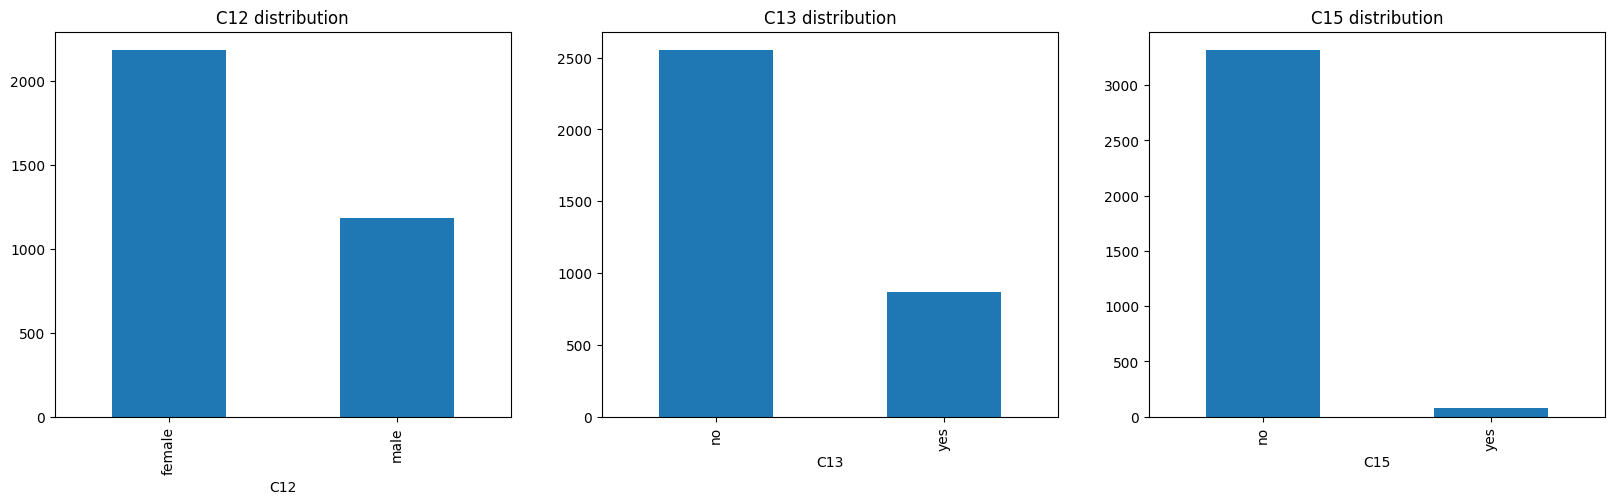

In [102]:
C0count = train['C12'].value_counts()
C1count = train['C13'].value_counts()
C2count = train['C15'].value_counts()

fix, ax = plt.subplots(1, 3, figsize=(20,5))

C0count.plot(kind='bar', ax = ax[0])
ax[0].set_title("C12 distribution")

C1count.plot(kind='bar', ax = ax[1])
ax[1].set_title("C13 distribution")

C2count.plot(kind='bar', ax = ax[2])
ax[2].set_title("C15 distribution")
plt.show()

In [103]:
numerical_miss = ['C17', 'C20', 'C22', 'C23', 'C25','C29']
category_miss = ['C0', 'C4', 'C5', 'C8', 'C9', 'C11', 'C12', 'C13', 'C15']
# strategy: 'mean', 'median', 'most_frequent', 'constant';

imputer = SimpleImputer(strategy= "median")
train[numerical_miss] = imputer.fit_transform(train[numerical_miss])

imputer = SimpleImputer(strategy= "most_frequent")
train[category_miss] = imputer.fit_transform(train[category_miss])
train

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C23,C24,C25,C26,C27,C28,C29,C30,regression target,classification target
0,divorced,Holders of other higher courses,second choice,Management,daytime,Higher education - degree,65.00,Portuguese,no,no,...,5.0,5,0.0,0.000000,0,11.1,0.6,2.02,0.6500,failure
1,single,Over 23 years old,second choice,Veterinary Nursing,daytime,Secondary education,65.00,Portuguese,no,no,...,6.0,14,2.0,11.333333,0,11.1,0.6,2.02,0.5500,success
2,single,1st phase - general contingent,seventh choice,Communication Design,daytime,Frequency of higher education,59.50,Portuguese,yes,no,...,6.0,8,6.0,13.625000,0,10.8,1.4,1.74,0.6160,success
3,married,Over 23 years old,second choice,Social Service,daytime,Basic education 3rd cycle (9th/10th/11th year) or equiv.,66.55,Portuguese,no,no,...,6.0,0,0.0,0.000000,0,15.5,2.8,-4.06,0.5175,failure
4,single,1st phase - general contingent,fourth choice,Nursing,daytime,Secondary education,71.00,Portuguese,yes,no,...,7.0,7,6.0,13.900000,0,7.6,2.6,0.32,0.6865,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,single,1st phase - general contingent,third choice,Communication Design,daytime,Secondary education,67.00,Portuguese,yes,no,...,6.0,11,4.0,11.333333,0,13.9,1.4,0.79,0.6385,failure
3535,single,1st phase - general contingent,second choice,Basic Education,daytime,Secondary education,66.50,Portuguese,yes,no,...,8.0,8,8.0,12.625000,0,15.5,2.8,-4.06,0.6565,success
3536,single,1st phase - general contingent,second choice,Social Service (evening attendance),evening,Secondary education,50.00,Portuguese,no,no,...,6.0,6,5.0,12.500000,0,12.7,3.7,-1.70,0.5640,success
3537,single,1st phase - general contingent,fifth choice,Social Service,daytime,Secondary education,63.50,Portuguese,yes,no,...,6.0,7,6.0,13.428571,0,11.1,0.6,2.02,0.6020,success


In [104]:
# check filling
missing_values = train.isnull().sum()
missing_values

C0                       0
C1                       0
C2                       0
C3                       0
C4                       0
C5                       0
C6                       0
C7                       0
C8                       0
C9                       0
C10                      0
C11                      0
C12                      0
C13                      0
C14                      0
C15                      0
C16                      0
C17                      0
C18                      0
C19                      0
C20                      0
C21                      0
C22                      0
C23                      0
C24                      0
C25                      0
C26                      0
C27                      0
C28                      0
C29                      0
C30                      0
regression target        0
classification target    0
dtype: int64

## Q8: Normalization and Standardization

In [105]:
# before normalization
train[['C6']].head(10)

,C6
0,65.00
1,65.00
2,59.50
3,66.55
4,71.00
5,70.00
6,57.50
7,65.50
8,70.00
9,80.00


In [106]:
# normalization
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
numerical = ['C6', 'C14', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30']
normalized = train.copy()

In [107]:
normalized[numerical] = std_scaler.fit_transform(normalized[numerical])
# after normalization
normalized[['C6']].head(10)

,C6
0,-0.200135
1,-0.200135
2,-1.031074
3,0.034039
4,0.706344
5,0.555264
6,-1.333234
7,-0.124595
8,0.555264
9,2.066063


In [108]:
normalized[numerical] = rob_scaler.fit_transform(normalized[numerical])
normalized[['C6']].head(10)

,C6
0,-0.206667
1,-0.206667
2,-0.940000
3,0.000000
4,0.593333
5,0.460000
6,-1.206667
7,-0.140000
8,0.460000
9,1.793333


In [109]:
## Can change different scalers and corresponding results: 
# normalized[numerical] = std_scaler.fit_transform(normalized[numerical])
# normalized[numerical] = rob_scaler.fit_transform(normalized[numerical])
normalized[numerical] = minmax_scaler.fit_transform(normalized[numerical])
normalized

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C23,C24,C25,C26,C27,C28,C29,C30,regression target,classification target
0,divorced,Holders of other higher courses,second choice,Management,daytime,Higher education - degree,0.368421,Portuguese,no,no,...,0.217391,0.151515,0.00,0.000000,0.0,0.406977,0.311111,0.803170,0.6500,failure
1,single,Over 23 years old,second choice,Veterinary Nursing,daytime,Secondary education,0.368421,Portuguese,no,no,...,0.260870,0.424242,0.10,0.610256,0.0,0.406977,0.311111,0.803170,0.5500,success
2,single,1st phase - general contingent,seventh choice,Communication Design,daytime,Frequency of higher education,0.252632,Portuguese,yes,no,...,0.260870,0.242424,0.30,0.733654,0.0,0.372093,0.488889,0.766182,0.6160,success
3,married,Over 23 years old,second choice,Social Service,daytime,Basic education 3rd cycle (9th/10th/11th year) or equiv.,0.401053,Portuguese,no,no,...,0.260870,0.000000,0.00,0.000000,0.0,0.918605,0.800000,0.000000,0.5175,failure
4,single,1st phase - general contingent,fourth choice,Nursing,daytime,Secondary education,0.494737,Portuguese,yes,no,...,0.304348,0.212121,0.30,0.748462,0.0,0.000000,0.755556,0.578600,0.6865,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,single,1st phase - general contingent,third choice,Communication Design,daytime,Secondary education,0.410526,Portuguese,yes,no,...,0.260870,0.333333,0.20,0.610256,0.0,0.732558,0.488889,0.640687,0.6385,failure
3535,single,1st phase - general contingent,second choice,Basic Education,daytime,Secondary education,0.400000,Portuguese,yes,no,...,0.347826,0.242424,0.40,0.679808,0.0,0.918605,0.800000,0.000000,0.6565,success
3536,single,1st phase - general contingent,second choice,Social Service (evening attendance),evening,Secondary education,0.052632,Portuguese,no,no,...,0.260870,0.181818,0.25,0.673077,0.0,0.593023,1.000000,0.311757,0.5640,success
3537,single,1st phase - general contingent,fifth choice,Social Service,daytime,Secondary education,0.336842,Portuguese,yes,no,...,0.260870,0.212121,0.30,0.723077,0.0,0.406977,0.311111,0.803170,0.6020,success


In [110]:
# after normalization
normalized[['C6']].head(10)

,C6
0,0.368421
1,0.368421
2,0.252632
3,0.401053
4,0.494737
5,0.473684
6,0.210526
7,0.378947
8,0.473684
9,0.684211


## Q9: Encoding Categorical Variables

In [111]:
# before processing
train[['C0']].head(10)

,C0
0,divorced
1,single
2,single
3,married
4,single
5,single
6,single
7,single
8,single
9,single


In [112]:
# Use OneHotEncoder to encode categorical variables without sequences

encoder = OneHotEncoder(sparse=False)
onehot_col = ['C0', 'C1', 'C3', 'C4', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15']
encoded_data = encoder.fit_transform(train[onehot_col])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(onehot_col))

encoded = train.join(encoded_df)

encoded.drop((onehot_col), axis = 1, inplace = True)

encoded

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,C2,C5,C6,C14,C16,C17,C18,C19,C20,C21,...,C10_no,C10_yes,C11_no,C11_yes,C12_female,C12_male,C13_no,C13_yes,C15_no,C15_yes
0,second choice,Higher education - degree,65.00,35,0,5.0,5,0,0.000000,0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,second choice,Secondary education,65.00,25,0,6.0,13,3,11.666667,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,seventh choice,Frequency of higher education,59.50,22,0,6.0,6,6,14.166667,0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,second choice,Basic education 3rd cycle (9th/10th/11th year) or equiv.,66.55,42,0,6.0,0,0,0.000000,0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,fourth choice,Secondary education,71.00,22,0,7.0,7,6,12.328175,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,third choice,Secondary education,67.00,18,1,6.0,8,6,11.714286,1,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3535,second choice,Secondary education,66.50,20,0,6.0,9,5,14.333333,0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3536,second choice,Secondary education,50.00,23,0,6.0,6,6,14.166667,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3537,fifth choice,Secondary education,63.50,19,0,6.0,6,6,13.500000,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [113]:
train[["C2"]].value_counts()

C2            
second choice     2402
third choice       457
fourth choice      247
fifth choice       194
sixth choice       125
seventh choice     112
first choice         1
last choice          1
Name: count, dtype: int64

In [114]:
train[["C5"]].value_counts()

C5                                                      
Secondary education                                         3004
Technological specialization course                          162
Basic education 3rd cycle (9th/10th/11th year) or equiv.     122
Higher education - degree                                     96
Other - 11th year of schooling                                33
Higher education - degree (1st cycle)                         32
Professional higher technical course                          27
Higher education - bachelor's degree                          16
Frequency of higher education                                 14
12th year of schooling - not completed                        10
Basic education 2nd cycle (6th/7th/8th year) or equiv.         7
Higher education - master's                                    7
Higher education - master (2nd cycle)                          4
11th year of schooling - not completed                         2
10th year of schooling - not comp

In [115]:
# Use OrdinalEncoder to encode categorical variables with sequences

encoder = OrdinalEncoder(categories=[['first choice', 'second choice', 'third choice', 'fourth choice', 'fifth choice', 'sixth choice', 'seventh choice', 'last choice']])
encoded['C2_encoded'] = encoder.fit_transform(train[['C2']])

categories_order = [["Basic education 2nd cycle (6th/7th/8th year) or equiv.",
                     'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
                     '10th year of schooling - not completed',
                     '10th year of schooling',
                     '11th year of schooling - not completed',
                     'Other - 11th year of schooling',
                     '12th year of schooling - not completed',
                     'Secondary education',
                     'Technological specialization course',
                     'Professional higher technical course',
                     "Higher education - bachelor's degree",
                     'Higher education - degree (1st cycle)',
                     'Higher education - degree',
                     'Higher education - master (2nd cycle)',
                     "Higher education - master's",
                     'Higher education - doctorate',
                     'Frequency of higher education']]
encoder = OrdinalEncoder(categories=categories_order)
encoded['C5_encoded'] = encoder.fit_transform(train[['C5']])

encoded.drop((['C2', 'C5']), axis = 1, inplace = True)

encoded

,C6,C14,C16,C17,C18,C19,C20,C21,C22,C23,...,C11_no,C11_yes,C12_female,C12_male,C13_no,C13_yes,C15_no,C15_yes,C2_encoded,C5_encoded
0,65.00,35,0,5.0,5,0,0.000000,0,0.0,5.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,12.0
1,65.00,25,0,6.0,13,3,11.666667,0,0.0,6.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,7.0
2,59.50,22,0,6.0,6,6,14.166667,0,0.0,6.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,6.0,16.0
3,66.55,42,0,6.0,0,0,0.000000,0,0.0,6.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,71.00,22,0,7.0,7,6,12.328175,0,0.0,7.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,67.00,18,1,6.0,8,6,11.714286,1,0.0,6.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,7.0
3535,66.50,20,0,6.0,9,5,14.333333,0,4.0,8.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,7.0
3536,50.00,23,0,6.0,6,6,14.166667,0,0.0,6.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,7.0
3537,63.50,19,0,6.0,6,6,13.500000,0,0.0,6.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,7.0


In [116]:
# show the first categorical feature after processing

encoded_df.iloc[:, :6].head(10)

,C0_divorced,C0_facto union,C0_legally separated,C0_married,C0_single,C0_widower
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0


## Q10: Feature Selection

In [117]:
# SelectKBest method for regression

k = 5
X = encoded.drop((['regression target', 'classification target']), axis=1)
y = encoded['regression target']
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
selected_features

Index(['C6', 'C1_Change of course',
       'C1_Technological specialization diploma holders',
       'C3_Animation and Multimedia Design', 'C5_encoded'],
      dtype='object')

In [118]:
# SelectKBest method for classification

encoded['classification target'] = encoded['classification target'].map({'success': 1, 'failure': 0})

k = 5
X = encoded.drop((['regression target', 'classification target']), axis=1)
y = encoded['classification target']
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
selected_features

Index(['C19', 'C20', 'C25', 'C26', 'C11_yes'], dtype='object')

In [119]:
# VarianceThreshold

minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

numerical = ['C6', 'C14', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30']

encoded_normalized = encoded.copy()
encoded_normalized[numerical] = std_scaler.fit_transform(encoded_normalized[numerical])

encoded1 = encoded_normalized.copy()
encoded1.drop((['regression target', 'classification target']), axis = 1, inplace=True)

# Define the threshold for variance
threshold = 1

# Create the VarianceThreshold object
selector = VarianceThreshold(threshold)

# Fit the selector to the data
selector.fit(encoded1)

# Get the indices of the selected features
selected_features = encoded1.columns[selector.get_support()]

# Create a new dataframe with only the selected features
selected_df = encoded1[selected_features]
selected_df

,C22,C27,C28,C29,C30,C2_encoded,C5_encoded
0,-0.281341,-0.196156,-0.173556,-0.476106,0.884784,1.0,12.0
1,-0.281341,-0.196156,-0.173556,-0.476106,0.884784,1.0,7.0
2,-0.281341,-0.196156,-0.285968,0.116556,0.761597,6.0,16.0
3,-0.281341,-0.196156,1.475143,1.153717,-1.790138,1.0,1.0
4,-0.281341,-0.196156,-1.485022,1.005551,0.136862,3.0,7.0
...,...,...,...,...,...,...,...
3534,-0.281341,-0.196156,0.875616,0.116556,0.343640,2.0,7.0
3535,1.881975,-0.196156,1.475143,1.153717,-1.790138,1.0,7.0
3536,-0.281341,-0.196156,0.425971,1.820462,-0.751846,1.0,7.0
3537,-0.281341,-0.196156,-0.173556,-0.476106,0.884784,4.0,7.0


## Q11: Feature Engineering

In [120]:
encoded_normalized

,C6,C14,C16,C17,C18,C19,C20,C21,C22,C23,...,C11_no,C11_yes,C12_female,C12_male,C13_no,C13_yes,C15_no,C15_yes,C2_encoded,C5_encoded
0,-0.200135,1.588338,-0.300492,-0.508745,-0.773146,-1.531520,-2.255518,-0.194476,-0.281341,-0.540875,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,12.0
1,-0.200135,0.241831,-0.300492,-0.096082,1.130934,-0.552583,0.202131,-0.194476,-0.281341,-0.082833,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,7.0
2,-1.031074,-0.162121,-0.300492,-0.096082,-0.535136,0.426354,0.728771,-0.194476,-0.281341,-0.082833,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,6.0,16.0
3,0.034039,2.530892,-0.300492,-0.096082,-1.963196,-1.531520,-2.255518,-0.194476,-0.281341,-0.082833,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,0.706344,-0.162121,-0.300492,0.316581,-0.297126,0.426354,0.341482,-0.194476,-0.281341,0.375209,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0.102025,-0.700724,0.139128,-0.096082,-0.059116,0.426354,0.212163,1.279294,-0.281341,-0.082833,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,7.0
3535,0.026485,-0.431422,-0.300492,-0.096082,0.178894,0.100042,0.763880,-0.194476,1.881975,0.833250,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,7.0
3536,-2.466332,-0.027470,-0.300492,-0.096082,-0.535136,0.426354,0.728771,-0.194476,-0.281341,-0.082833,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,7.0
3537,-0.426755,-0.566073,-0.300492,-0.096082,-0.535136,0.426354,0.588333,-0.194476,-0.281341,-0.082833,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,7.0


<Axes: >

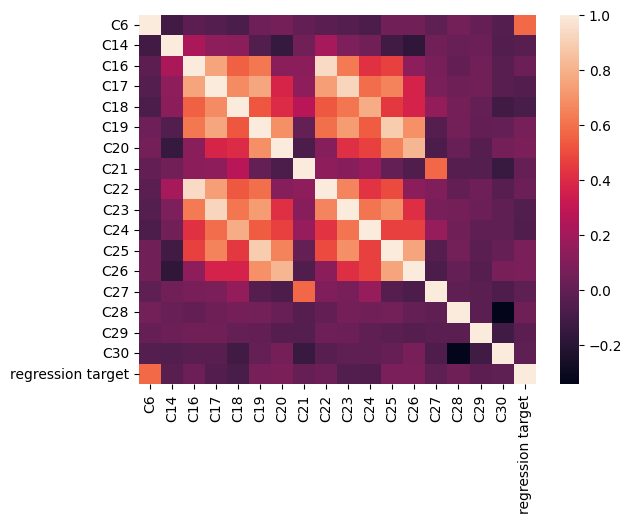

In [121]:
numerical = encoded_normalized[['C6', 'C14', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'regression target']]
sns.heatmap(numerical.corr())

C6                     0.576126
C14                   -0.030737
C16                    0.024843
C17                   -0.052659
C18                   -0.082831
                         ...   
C15_no                -0.029739
C15_yes                0.029739
C2_encoded            -0.091764
C5_encoded             0.172261
C17_C23_interaction    0.085237
Name: regression target, Length: 98, dtype: float64


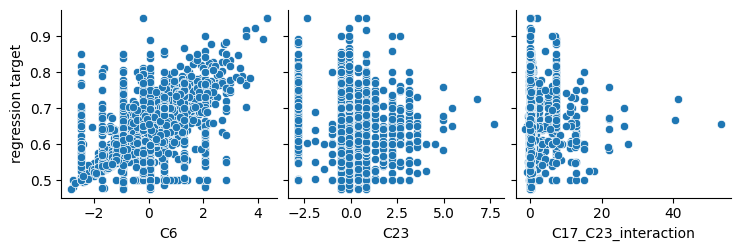

In [122]:
# creating interaction features, which are products of two or more existing features.
encoded_normalized['C17_C23_interaction'] = encoded_normalized['C17'] * encoded_normalized['C23']

# Visualize the relationship between features and target
sns.pairplot(encoded_normalized, x_vars=['C6', 'C23', 'C17_C23_interaction'], y_vars='regression target')

# Calculate the correlation
correlation = encoded_normalized.corr()
print(correlation['regression target'])

plt.show()

# Part 3: Regression

## 1. Linear Regression

In [123]:
# normalize the regression target so that all the features are the same scale
encoded_normalized[['regression target']] = std_scaler.fit_transform(encoded_normalized[['regression target']])
encoded_normalized

,C6,C14,C16,C17,C18,C19,C20,C21,C22,C23,...,C11_yes,C12_female,C12_male,C13_no,C13_yes,C15_no,C15_yes,C2_encoded,C5_encoded,C17_C23_interaction
0,-0.200135,1.588338,-0.300492,-0.508745,-0.773146,-1.531520,-2.255518,-0.194476,-0.281341,-0.540875,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,12.0,0.275167
1,-0.200135,0.241831,-0.300492,-0.096082,1.130934,-0.552583,0.202131,-0.194476,-0.281341,-0.082833,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,7.0,0.007959
2,-1.031074,-0.162121,-0.300492,-0.096082,-0.535136,0.426354,0.728771,-0.194476,-0.281341,-0.082833,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,6.0,16.0,0.007959
3,0.034039,2.530892,-0.300492,-0.096082,-1.963196,-1.531520,-2.255518,-0.194476,-0.281341,-0.082833,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.007959
4,0.706344,-0.162121,-0.300492,0.316581,-0.297126,0.426354,0.341482,-0.194476,-0.281341,0.375209,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,7.0,0.118784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0.102025,-0.700724,0.139128,-0.096082,-0.059116,0.426354,0.212163,1.279294,-0.281341,-0.082833,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,7.0,0.007959
3535,0.026485,-0.431422,-0.300492,-0.096082,0.178894,0.100042,0.763880,-0.194476,1.881975,0.833250,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,7.0,-0.080060
3536,-2.466332,-0.027470,-0.300492,-0.096082,-0.535136,0.426354,0.728771,-0.194476,-0.281341,-0.082833,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,7.0,0.007959
3537,-0.426755,-0.566073,-0.300492,-0.096082,-0.535136,0.426354,0.588333,-0.194476,-0.281341,-0.082833,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,7.0,0.007959


Choose 6 features and build six linear regression models

In [124]:
X = encoded_normalized[['C6']]
y = encoded_normalized[['regression target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
reg = model.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.6068057192641646
R-squared score: 0.3457983455467898


In [125]:
X = encoded_normalized[['C26']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.9347270299194668
R-squared score: -0.007736001857362673


In [126]:
encoded_df

,C0_divorced,C0_facto union,C0_legally separated,C0_married,C0_single,C0_widower,C1_1st phase - general contingent,C1_1st phase - special contingent (Azores Island),C1_1st phase - special contingent (Madeira Island),C1_2nd phase - general contingent,...,C10_no,C10_yes,C11_no,C11_yes,C12_female,C12_male,C13_no,C13_yes,C15_no,C15_yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3535,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3536,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3537,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [127]:
X = encoded_normalized[['C12_female']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.9275349360957756
R-squared score: 1.7846745361538296e-05


In [128]:
X = encoded_normalized[['C4_daytime']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.9278987995999811
R-squared score: -0.0003744371420333348


In [129]:
X = encoded_normalized[['C5_encoded']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.9198175824487981
R-squared score: 0.008337981779644843


In [130]:
X = encoded_normalized[['C15_yes']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.9256144064964837
R-squared score: 0.002088383659230364


Build another regression model combine all the six features

In [131]:
X = encoded_normalized[['C6','C26', 'C12_female', 'C4_daytime', 'C5_encoded', 'C15_yes']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)
print("training time:", training_time)

Mean Squared Error: 0.6164152227115341
R-squared score: 0.33543827006601434
training time: 0.0012049674987792969


Categorical Feature with more than 2 possible values

In [132]:
X = encoded_normalized[['C0_divorced']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.9278043707062131
R-squared score: -0.00027263266562504995


In [133]:
X = encoded_normalized[['C0_facto union']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.9279282149856078
R-squared score: -0.000406150082983725


In [134]:
X = encoded_normalized[['C0_legally separated']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.9261316570647588
R-squared score: 0.0015307320636871458


In [135]:
X = encoded_normalized[['C0_married']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.9297408329057635
R-squared score: -0.0023603466315846866


In [136]:
X = encoded_normalized[['C0_single']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.9301822571252647
R-squared score: -0.002836249289627446


In [137]:
X = encoded_normalized[['C0_widower']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.9254651719522229
R-squared score: 0.002249274505604304


In [138]:
X = encoded_normalized[['C0_divorced', 'C0_facto union', 'C0_legally separated','C0_married', 'C0_single', 'C0_widower']]
y = encoded_normalized['regression target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.9223223486118206
R-squared score: 0.005637575181871135


## 2. Feedforward neural network

Hidden Units: 1, Mean Training Time: 0.08 +/- 0.00, Mean R2 Score: -0.00 +/- 0.00
Hidden Units: 8, Mean Training Time: 0.08 +/- 0.00, Mean R2 Score: 0.37 +/- 0.00
Hidden Units: 32, Mean Training Time: 0.46 +/- 0.08, Mean R2 Score: 0.41 +/- 0.00
Hidden Units: 128, Mean Training Time: 0.82 +/- 0.13, Mean R2 Score: 0.41 +/- 0.00


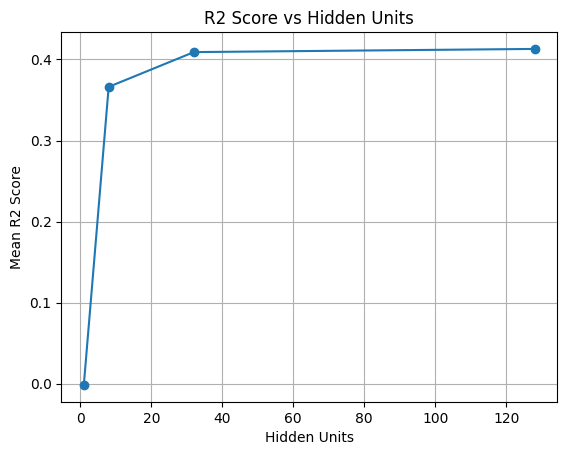

In [139]:
X = encoded_normalized[['C6','C26', 'C12_female', 'C4_daytime', 'C5_encoded', 'C15_yes']]
y = encoded_normalized['regression target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4211)

def train_evaluate_nn(hidden_units, X_train, y_train, X_val, y_val):
    model = MLPRegressor(hidden_layer_sizes=(hidden_units, hidden_units, hidden_units),
                         early_stopping=True, random_state=4211)
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    return training_time, r2

hidden_units_list = [1, 8, 32, 128]
results = []

for h in hidden_units_list:
    times = []
    r2_scores = []
    for _ in range(3):
        training_time, r2 = train_evaluate_nn(h, X_train, y_train, X_val, y_val)
        times.append(training_time)
        r2_scores.append(r2)
    mean_time = np.mean(times)
    std_time = np.std(times)
    mean_r2 = np.mean(r2_scores)
    std_r2 = np.std(r2_scores)
    results.append((h, mean_time, std_time, mean_r2, std_r2))

# Print results
for h, mean_time, std_time, mean_r2, std_r2 in results:
    print(f"Hidden Units: {h}, Mean Training Time: {mean_time:.2f} +/- {std_time:.2f}, Mean R2 Score: {mean_r2:.2f} +/- {std_r2:.2f}")


plt.plot(hidden_units_list, [mean_r2 for _, _, _, mean_r2, _ in results], marker='o')
plt.xlabel('Hidden Units')
plt.ylabel('Mean R2 Score')
plt.title('R2 Score vs Hidden Units')
plt.grid()
plt.show()

# Part 4: Classification

## 1. Logistic Regression

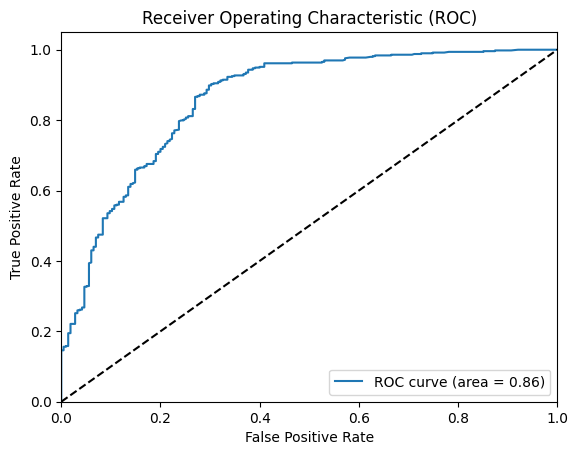

AUC: 0.8600830227840937

Mean training time: 0.002742608388264974
Standard deviation of training time: 0.0001975858003417729

Mean accuracy: 0.8347457627118645
Standard deviation of accuracy: 1.1102230246251565e-16

Mean F1 score: 0.8901408450704226
Standard deviation of F1 score: 0.0


In [140]:
n_runs = 3
training_times = []
accuracies = []
f1_scores = []

# Select features and target
features = encoded_normalized[['C6','C26', 'C12_female', 'C4_daytime', 'C5_encoded', 'C15_yes']]
target = encoded_normalized['classification target']

for i in range(n_runs):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=4211)

    # Create a logistic regression model with gradient descent
    model = SGDClassifier(loss='log_loss', learning_rate='invscaling', eta0=0.01, power_t=0.25, max_iter=10000)
    # model = LogisticRegression(solver='saga', max_iter=10000)

    # Train the model and record the training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Evaluate the model on the validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Store the results
    training_times.append(training_time)
    accuracies.append(accuracy)
    f1_scores.append(f1)

    if (i == (n_runs - 1)):
        # Calculate ROC curve and AUC
        y_prob = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()
        print('AUC:', roc_auc)
        print("")


# Calculate mean and standard deviation
mean_training_time = np.mean(training_times)
std_training_time = np.std(training_times)
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print results
print('Mean training time:', mean_training_time)
print('Standard deviation of training time:', std_training_time)
print("")
print('Mean accuracy:', mean_accuracy)
print('Standard deviation of accuracy:', std_accuracy)
print("")
print('Mean F1 score:', mean_f1_score)
print('Standard deviation of F1 score:', std_f1_score)

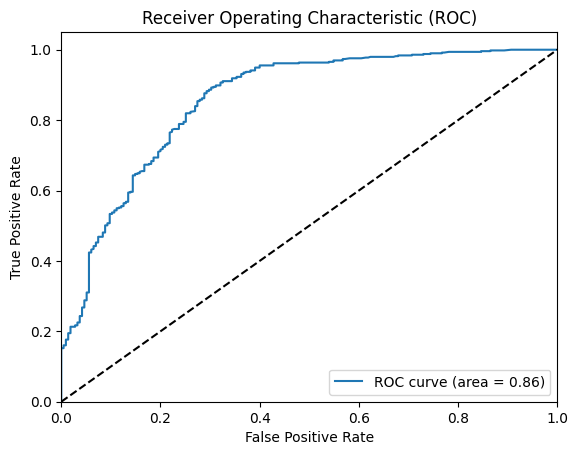

AUC: 0.8570168404170009

Mean training time: 0.0031845569610595703
Standard deviation of training time: 0.0002663263237036093

Mean accuracy: 0.8347457627118645
Standard deviation of accuracy: 1.1102230246251565e-16

Mean F1 score: 0.8901408450704226
Standard deviation of F1 score: 0.0


In [141]:
## different learning rates 0.1

n_runs = 3
training_times = []
accuracies = []
f1_scores = []

# Select features and target
features = encoded_normalized[['C6','C26', 'C12_female', 'C4_daytime', 'C5_encoded', 'C15_yes']]
target = encoded_normalized['classification target']

for i in range(n_runs):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=4211)

    # Create a logistic regression model with gradient descent
    model = SGDClassifier(loss='log_loss', learning_rate='invscaling', eta0=0.1, power_t=0.25, max_iter=10000)
    # model = LogisticRegression(solver='saga', max_iter=10000)

    # Train the model and record the training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Evaluate the model on the validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Store the results
    training_times.append(training_time)
    accuracies.append(accuracy)
    f1_scores.append(f1)

    if (i == (n_runs - 1)):
        # Calculate ROC curve and AUC
        y_prob = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()
        print('AUC:', roc_auc)
        print("")


# Calculate mean and standard deviation
mean_training_time = np.mean(training_times)
std_training_time = np.std(training_times)
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print results
print('Mean training time:', mean_training_time)
print('Standard deviation of training time:', std_training_time)
print("")
print('Mean accuracy:', mean_accuracy)
print('Standard deviation of accuracy:', std_accuracy)
print("")
print('Mean F1 score:', mean_f1_score)
print('Standard deviation of F1 score:', std_f1_score)

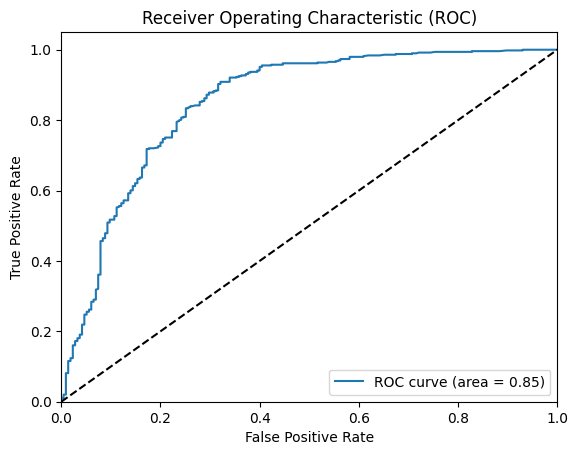

AUC: 0.8506674843152978

Mean training time: 0.005899349848429362
Standard deviation of training time: 0.0003487217827996637

Mean accuracy: 0.8347457627118645
Standard deviation of accuracy: 1.1102230246251565e-16

Mean F1 score: 0.8901408450704226
Standard deviation of F1 score: 0.0


In [142]:
## different learning rates 0.001

n_runs = 3
training_times = []
accuracies = []
f1_scores = []

# Select features and target
features = encoded_normalized[['C6','C26', 'C12_female', 'C4_daytime', 'C5_encoded', 'C15_yes']]
target = encoded_normalized['classification target']

for i in range(n_runs):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=4211)

    # Create a logistic regression model with gradient descent
    model = SGDClassifier(loss='log_loss', learning_rate='invscaling', eta0=0.001, power_t=0.25, max_iter=10000)
    # model = LogisticRegression(solver='saga', max_iter=10000)

    # Train the model and record the training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Evaluate the model on the validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Store the results
    training_times.append(training_time)
    accuracies.append(accuracy)
    f1_scores.append(f1)

    if (i == (n_runs - 1)):
        # Calculate ROC curve and AUC
        y_prob = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()
        print('AUC:', roc_auc)
        print("")


# Calculate mean and standard deviation
mean_training_time = np.mean(training_times)
std_training_time = np.std(training_times)
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print results
print('Mean training time:', mean_training_time)
print('Standard deviation of training time:', std_training_time)
print("")
print('Mean accuracy:', mean_accuracy)
print('Standard deviation of accuracy:', std_accuracy)
print("")
print('Mean F1 score:', mean_f1_score)
print('Standard deviation of F1 score:', std_f1_score)

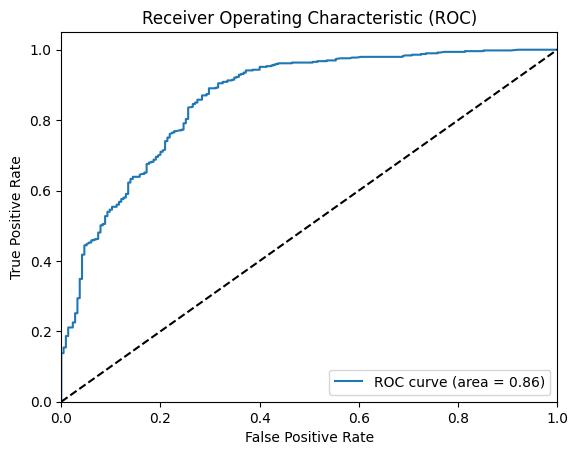

AUC: 0.8619510354261993

Mean training time: 0.007080952326456706
Standard deviation of training time: 0.0003030625788614261

Mean accuracy: 0.8347457627118645
Standard deviation of accuracy: 1.1102230246251565e-16

Mean F1 score: 0.8901408450704226
Standard deviation of F1 score: 0.0


In [143]:
## different learning rates: adaptive

n_runs = 3
training_times = []
accuracies = []
f1_scores = []

# Select features and target
features = encoded_normalized[['C6','C26', 'C12_female', 'C4_daytime', 'C5_encoded', 'C15_yes']]
target = encoded_normalized['classification target']

for i in range(n_runs):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=4211)

    # Create a logistic regression model with gradient descent
    model = SGDClassifier(loss='log_loss', learning_rate='adaptive',eta0=0.01, power_t=0.25, max_iter=10000)
    # model = LogisticRegression(solver='saga', max_iter=10000)

    # Train the model and record the training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Evaluate the model on the validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Store the results
    training_times.append(training_time)
    accuracies.append(accuracy)
    f1_scores.append(f1)

    if (i == (n_runs - 1)):
        # Calculate ROC curve and AUC
        y_prob = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()
        print('AUC:', roc_auc)
        print("")


# Calculate mean and standard deviation
mean_training_time = np.mean(training_times)
std_training_time = np.std(training_times)
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print results
print('Mean training time:', mean_training_time)
print('Standard deviation of training time:', std_training_time)
print("")
print('Mean accuracy:', mean_accuracy)
print('Standard deviation of accuracy:', std_accuracy)
print("")
print('Mean F1 score:', mean_f1_score)
print('Standard deviation of F1 score:', std_f1_score)

## 2. Feedback Neural Network

Hidden Units: 1, Mean Training Time: 0.03 +/- 0.00, Mean Accuracy: 0.30 +/- 0.00, Mean F1 Score: 0.00 +/- 0.00
Hidden Units: 8, Mean Training Time: 0.04 +/- 0.00, Mean Accuracy: 0.70 +/- 0.00, Mean F1 Score: 0.82 +/- 0.00
Hidden Units: 32, Mean Training Time: 0.10 +/- 0.02, Mean Accuracy: 0.70 +/- 0.00, Mean F1 Score: 0.82 +/- 0.00
Hidden Units: 128, Mean Training Time: 0.89 +/- 0.13, Mean Accuracy: 0.84 +/- 0.00, Mean F1 Score: 0.89 +/- 0.00


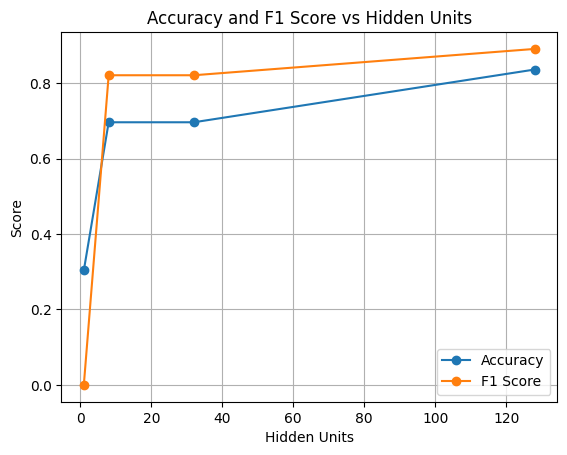

In [144]:
X = encoded_normalized[['C6','C26', 'C12_female', 'C4_daytime', 'C5_encoded', 'C15_yes']]
y = encoded_normalized['classification target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4211)

def train_evaluate_nn(hidden_units, X_train, y_train, X_val, y_val):
    model = MLPClassifier(hidden_layer_sizes=(hidden_units, hidden_units, hidden_units),
                          activation='logistic',early_stopping=True, random_state=4211)
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = model.predict(X_val)
    accuracy = model.score(X_val, y_val)
    f1 = f1_score(y_val, y_pred)
    return training_time, accuracy, f1

hidden_units_list = [1, 8, 32, 128]
results = []

for h in hidden_units_list:
    times = []
    accuracies = []
    f1_scores = []
    for _ in range(3):
        training_time, accuracy, f1 = train_evaluate_nn(h, X_train, y_train, X_val, y_val)
        times.append(training_time)
        accuracies.append(accuracy)
        f1_scores.append(f1)
    mean_time = np.mean(times)
    std_time = np.std(times)
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    results.append((h, mean_time, std_time, mean_accuracy, std_accuracy, mean_f1, std_f1))

# Print results
for h, mean_time, std_time, mean_accuracy, std_accuracy, mean_f1, std_f1 in results:
    print(f"Hidden Units: {h}, Mean Training Time: {mean_time:.2f} +/- {std_time:.2f}, Mean Accuracy: {mean_accuracy:.2f} +/- {std_accuracy:.2f}, Mean F1 Score: {mean_f1:.2f} +/- {std_f1:.2f}")

plt.plot(hidden_units_list, [mean_accuracy for _, _, _, mean_accuracy, _, _, _ in results], marker='o', label='Accuracy')
plt.plot(hidden_units_list, [mean_f1 for _, _, _, _, _, mean_f1, _ in results], marker='o', label='F1 Score')
plt.xlabel('Hidden Units')
plt.ylabel('Score')
plt.title('Accuracy and F1 Score vs Hidden Units')
plt.legend()
plt.grid()
plt.show()

# Part 5: Performance Enhancement

## 1. Preprocessing Validation

### Q24 Combination A

In [145]:
# Combination A

Comb_A = pd.read_csv('data/train.csv')

numerical_miss = ['C17', 'C20', 'C22', 'C23', 'C25','C29']
category_miss = ['C0', 'C4', 'C5', 'C8', 'C9', 'C11', 'C12', 'C13', 'C15']

# SimpleImputer for missing value
imputer = SimpleImputer(strategy= "mean")
Comb_A[numerical_miss] = imputer.fit_transform(Comb_A[numerical_miss])
imputer = SimpleImputer(strategy= "most_frequent")
Comb_A[category_miss] = imputer.fit_transform(Comb_A[category_miss])

# StandardScaler for normalization
std_scaler = StandardScaler()
numerical = ['C6', 'C14', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30']
Comb_A[numerical] = std_scaler.fit_transform(Comb_A[numerical])

#OneHotEncoder
encoder = OneHotEncoder(sparse=False)
onehot_col = ['C0', 'C1', 'C2','C3', 'C4','C5','C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15']
encoded_data = encoder.fit_transform(Comb_A[onehot_col])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(onehot_col))
Comb_A = Comb_A.join(encoded_df)
Comb_A.drop((onehot_col), axis = 1, inplace = True)

Comb_A

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,C6,C14,C16,C17,C18,C19,C20,C21,C22,C23,...,C10_no,C10_yes,C11_no,C11_yes,C12_female,C12_male,C13_no,C13_yes,C15_no,C15_yes
0,-0.200135,1.588338,-0.300492,-0.513041,-0.773146,-1.531520,-2.244836e+00,-0.194476,-0.282670,-0.541550,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.200135,0.241831,-0.300492,-0.100296,1.130934,-0.552583,2.201216e-01,-0.194476,-0.282670,-0.083496,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-1.031074,-0.162121,-0.300492,-0.100296,-0.535136,0.426354,7.483267e-01,-0.194476,-0.282670,-0.083496,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.034039,2.530892,-0.300492,-0.100296,-1.963196,-1.531520,-2.244836e+00,-0.194476,-0.282670,-0.083496,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.706344,-0.162121,-0.300492,0.312450,-0.297126,0.426354,3.753123e-16,-0.194476,-0.282670,0.374558,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0.102025,-0.700724,0.139128,-0.100296,-0.059116,0.426354,2.301826e-01,1.279294,-0.282670,-0.083496,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3535,0.026485,-0.431422,-0.300492,-0.100296,0.178894,0.100042,7.835404e-01,-0.194476,1.881036,0.832613,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3536,-2.466332,-0.027470,-0.300492,-0.100296,-0.535136,0.426354,7.483267e-01,-0.194476,-0.282670,-0.083496,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3537,-0.426755,-0.566073,-0.300492,-0.100296,-0.535136,0.426354,6.074720e-01,-0.194476,-0.282670,-0.083496,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [146]:
X = Comb_A.drop(['regression target', 'classification target'], axis = 1)
y = Comb_A['classification target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4211)

def train_evaluate_nn(hidden_units, X_train, y_train, X_val, y_val):
    model = MLPClassifier(hidden_layer_sizes=(hidden_units, hidden_units, hidden_units),early_stopping=True, random_state=4211)
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = model.predict(X_val)
    accuracy = model.score(X_val, y_val)
    f1 = f1_score(y_val, y_pred, pos_label= 'success')
    return training_time, accuracy, f1

hidden_units_list = [32]
results = []

for h in hidden_units_list:
    times = []
    accuracies = []
    f1_scores = []
    for _ in range(3):
        training_time, accuracy, f1 = train_evaluate_nn(h, X_train, y_train, X_val, y_val)
        times.append(training_time)
        accuracies.append(accuracy)
        f1_scores.append(f1)
    mean_time = np.mean(times)
    std_time = np.std(times)
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    results.append((h, mean_time, std_time, mean_accuracy, std_accuracy, mean_f1, std_f1))

# Print results
for h, mean_time, std_time, mean_accuracy, std_accuracy, mean_f1, std_f1 in results:
    print(f"Hidden Units: {h}, Mean Training Time: {mean_time:.4f} +/- {std_time:.4f}, Mean Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}, Mean F1 Score: {mean_f1:.4f} +/- {std_f1:.4f}")

Hidden Units: 32, Mean Training Time: 0.2304 +/- 0.0357, Mean Accuracy: 0.8856 +/- 0.0000, Mean F1 Score: 0.9213 +/- 0.0000


### Q25 Combination B

In [147]:
# Combination B

Comb_B = pd.read_csv('data/train.csv')

numerical_miss = ['C17', 'C20', 'C22', 'C23', 'C25','C29']
category_miss = ['C0', 'C4', 'C5', 'C8', 'C9', 'C11', 'C12', 'C13', 'C15']

# SimpleImputer for missing value
imputer = SimpleImputer(strategy= "constant", fill_value=0)
Comb_B[numerical_miss] = imputer.fit_transform(Comb_B[numerical_miss])
imputer = SimpleImputer(strategy= "most_frequent")
Comb_B[category_miss] = imputer.fit_transform(Comb_B[category_miss])

# MinMaxScaler for normalization
minmax_scaler = MinMaxScaler()
numerical = ['C6', 'C14', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30']
Comb_B[numerical] = minmax_scaler.fit_transform(Comb_B[numerical])

#OneHotEncoder
encoder = OneHotEncoder(sparse=False)
onehot_col = ['C0','C1','C3', 'C4','C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15']
encoded_data = encoder.fit_transform(Comb_B[onehot_col])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(onehot_col))
Comb_B = Comb_B.join(encoded_df)
Comb_B.drop((onehot_col), axis = 1, inplace = True)

# OrdinalEncoder
encoder = OrdinalEncoder(categories=[['first choice', 'second choice', 'third choice', 'fourth choice', 'fifth choice', 'sixth choice', 'seventh choice', 'last choice']])
Comb_B['C2_encoded'] = encoder.fit_transform(Comb_B[['C2']])
categories_order = [["Basic education 2nd cycle (6th/7th/8th year) or equiv.",
                     'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
                     '10th year of schooling - not completed',
                     '10th year of schooling',
                     '11th year of schooling - not completed',
                     'Other - 11th year of schooling',
                     '12th year of schooling - not completed',
                     'Secondary education',
                     'Technological specialization course',
                     'Professional higher technical course',
                     "Higher education - bachelor's degree",
                     'Higher education - degree (1st cycle)',
                     'Higher education - degree',
                     'Higher education - master (2nd cycle)',
                     "Higher education - master's",
                     'Higher education - doctorate',
                     'Frequency of higher education']]
encoder = OrdinalEncoder(categories=categories_order)
Comb_B['C5_encoded'] = encoder.fit_transform(Comb_B[['C5']])
Comb_B.drop((['C2', 'C5']), axis = 1, inplace = True)


Comb_B

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,C6,C14,C16,C17,C18,C19,C20,C21,C22,C23,...,C11_no,C11_yes,C12_female,C12_male,C13_no,C13_yes,C15_no,C15_yes,C2_encoded,C5_encoded
0,0.368421,0.339623,0.00,0.192308,0.111111,0.000000,0.000000,0.000000,0.000000,0.217391,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,12.0
1,0.368421,0.150943,0.00,0.230769,0.288889,0.115385,0.618102,0.000000,0.000000,0.260870,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,7.0
2,0.252632,0.094340,0.00,0.230769,0.133333,0.230769,0.750552,0.000000,0.000000,0.260870,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,6.0,16.0
3,0.401053,0.471698,0.00,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.260870,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,0.494737,0.094340,0.00,0.269231,0.155556,0.230769,0.000000,0.000000,0.000000,0.304348,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0.410526,0.018868,0.05,0.230769,0.177778,0.230769,0.620624,0.083333,0.000000,0.260870,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,7.0
3535,0.400000,0.056604,0.00,0.230769,0.200000,0.192308,0.759382,0.000000,0.222222,0.347826,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,7.0
3536,0.052632,0.113208,0.00,0.230769,0.133333,0.230769,0.750552,0.000000,0.000000,0.260870,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,7.0
3537,0.336842,0.037736,0.00,0.230769,0.133333,0.230769,0.715232,0.000000,0.000000,0.260870,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,7.0


In [148]:
X = Comb_B.drop(['regression target', 'classification target'], axis = 1)
y = Comb_B['classification target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4211)

hidden_units_list = [32]
results = []

for h in hidden_units_list:
    times = []
    accuracies = []
    f1_scores = []
    for _ in range(3):
        training_time, accuracy, f1 = train_evaluate_nn(h, X_train, y_train, X_val, y_val)
        times.append(training_time)
        accuracies.append(accuracy)
        f1_scores.append(f1)
    mean_time = np.mean(times)
    std_time = np.std(times)
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    results.append((h, mean_time, std_time, mean_accuracy, std_accuracy, mean_f1, std_f1))

# Print results
for h, mean_time, std_time, mean_accuracy, std_accuracy, mean_f1, std_f1 in results:
    print(f"Hidden Units: {h}, Mean Training Time: {mean_time:.4f} +/- {std_time:.4f}, Mean Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}, Mean F1 Score: {mean_f1:.4f} +/- {std_f1:.4f}")


Hidden Units: 32, Mean Training Time: 0.4811 +/- 0.0542, Mean Accuracy: 0.8771 +/- 0.0000, Mean F1 Score: 0.9166 +/- 0.0000


In [149]:
# Combination C

Comb_C = pd.read_csv('data/train.csv')

numerical_miss = ['C17', 'C20', 'C22', 'C23', 'C25','C29']
category_miss = ['C0', 'C4', 'C5', 'C8', 'C9', 'C11', 'C12', 'C13', 'C15']

# SimpleImputer for missing value
imputer = SimpleImputer(strategy= "mean")
Comb_C[numerical_miss] = imputer.fit_transform(Comb_C[numerical_miss])
imputer = SimpleImputer(strategy= "most_frequent")
Comb_C[category_miss] = imputer.fit_transform(Comb_C[category_miss])

# MinMaxScaler for normalization
minmax_scaler = MinMaxScaler()
numerical = ['C6', 'C14', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30']
Comb_C[numerical] = minmax_scaler.fit_transform(Comb_C[numerical])

#OneHotEncoder
encoder = OneHotEncoder(sparse=False)
onehot_col = ['C0','C1','C3', 'C4','C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15']
encoded_data = encoder.fit_transform(Comb_C[onehot_col])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(onehot_col))
Comb_C = Comb_C.join(encoded_df)
Comb_C.drop((onehot_col), axis = 1, inplace = True)

# OrdinalEncoder
encoder = OrdinalEncoder(categories=[['first choice', 'second choice', 'third choice', 'fourth choice', 'fifth choice', 'sixth choice', 'seventh choice', 'last choice']])
Comb_C['C2_encoded'] = encoder.fit_transform(Comb_C[['C2']])
categories_order = [["Basic education 2nd cycle (6th/7th/8th year) or equiv.",
                     'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
                     '10th year of schooling - not completed',
                     '10th year of schooling',
                     '11th year of schooling - not completed',
                     'Other - 11th year of schooling',
                     '12th year of schooling - not completed',
                     'Secondary education',
                     'Technological specialization course',
                     'Professional higher technical course',
                     "Higher education - bachelor's degree",
                     'Higher education - degree (1st cycle)',
                     'Higher education - degree',
                     'Higher education - master (2nd cycle)',
                     "Higher education - master's",
                     'Higher education - doctorate',
                     'Frequency of higher education']]
encoder = OrdinalEncoder(categories=categories_order)
Comb_C['C5_encoded'] = encoder.fit_transform(Comb_C[['C5']])
Comb_C.drop((['C2', 'C5']), axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [150]:
# SelectKBest method for classification

# Comb_C['classification target binary'] = Comb_C['classification target'].map({'success': 1, 'failure': 0})

# k = 20
# X = Comb_C.drop((['regression target', 'classification target', 'classification target binary']), axis=1)
# y = Comb_C['classification target binary']
# selector = SelectKBest(score_func=f_regression, k=k)
# X_new = selector.fit_transform(X, y)
# selected_features = X.columns[selector.get_support()]
# selected_features

In [151]:
# numerical = Comb_C[['C17', 'C19', 'C20', 'C23', 'C24', 'C25', 'C26', 'classification target binary']]
# sns.heatmap(numerical.corr())

In [152]:
# Comb_C['C17 * C23'] = Comb_C['C17'] * Comb_C['C23']

In [153]:
# top 5 features
# X = Comb_C[['C19', 'C20', 'C25', 'C26', 'C11_yes']]   

# top 10 features
# X = Comb_C[['C14','C19', 'C20', 'C25', 'C26', 'C1_Over 23 years old', 'C11_yes', 'C13_yes']]   

# top 15 features
# X = Comb_C[[ 'C14', 'C19', 'C20', 'C25', 'C26','C1_1st phase - general contingent','C1_Over 23 years old', 'C10_yes', 'C11_yes', 'C12_female', 'C13_yes']]

# top 20 features
# X = Comb_C[['C14', 'C17', 'C19', 'C20', 'C23', 'C24', 'C25', 'C26','C1_1st phase - general contingent','C1_Holders of other higher courses', 'C1_Over 23 years old','C3_Nursing', 'C10_yes', 'C11_yes', 'C12_female', 'C13_yes']]

# with interacting feature
# X = Comb_C[[ 'C14', 'C17 * C23', 'C19', 'C20', 'C24', 'C25', 'C26','C1_1st phase - general contingent','C1_Holders of other higher courses', 'C1_Over 23 years old','C3_Nursing', 'C10_yes', 'C11_yes', 'C12_female', 'C13_yes']] 

X = Comb_C.drop(['regression target', 'classification target'], axis = 1)
y = Comb_C['classification target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4211)


hidden_units_list = [32]
results = []

for h in hidden_units_list:
    times = []
    accuracies = []
    f1_scores = []
    for _ in range(3):
        training_time, accuracy, f1 = train_evaluate_nn(h, X_train, y_train, X_val, y_val)
        times.append(training_time)
        accuracies.append(accuracy)
        f1_scores.append(f1)
    mean_time = np.mean(times)
    std_time = np.std(times)
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    results.append((h, mean_time, std_time, mean_accuracy, std_accuracy, mean_f1, std_f1))

# Print results
for h, mean_time, std_time, mean_accuracy, std_accuracy, mean_f1, std_f1 in results:
    print(f"Hidden Units: {h}, Mean Training Time: {mean_time:.4f} +/- {std_time:.4f}, Mean Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}, Mean F1 Score: {mean_f1:.4f} +/- {std_f1:.4f}")


Hidden Units: 32, Mean Training Time: 0.4869 +/- 0.0750, Mean Accuracy: 0.8898 +/- 0.0000, Mean F1 Score: 0.9243 +/- 0.0000


## Hyperparameter Tuning --------------------------------

In [154]:

X = Comb_C.drop(['regression target', 'classification target'], axis = 1)
y = Comb_C['classification target']

param_grid = {
    'hidden_layer_sizes': [(8,), (32,), (128,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

mlp = MLPClassifier(random_state=4211, early_stopping=True)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

pd.set_option('display.max_colwidth', None)
results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score').head(5)

In [155]:
results[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
52,"{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (32,), 'learning_rate': 'constant', 'solver': 'adam'}",0.870021,0.006956
54,"{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (32,), 'learning_rate': 'adaptive', 'solver': 'adam'}",0.870021,0.006956
66,"{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (32,), 'learning_rate': 'adaptive', 'solver': 'adam'}",0.868607,0.006450
64,"{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (32,), 'learning_rate': 'constant', 'solver': 'adam'}",0.868607,0.006450
28,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (32,), 'learning_rate': 'constant', 'solver': 'adam'}",0.868325,0.008989
